# Introduction to Python
### ...and BioPython!
##### Auguste Dutcher, Raghavan Lab
##### hdutcher@pdx.edu

## Why learn to program?

##### Work with large volumes of sequence data

##### Contribute quickly to a project

##### Build on an endlessly iterable foundation

## ... Also do your homework really fast.

In [ ]:
from count_features import ct_features
ct_features()

## Today:

##### Some fundamentals (variables, loops, and control flow)

##### Intro to iPython

##### Get started parsing some files

## Assigning variables

### Variables store information.

In [ ]:
count = 0
feature = "rRNA"
pi = 3.14

In [ ]:
count

In [ ]:
feature

In [ ]:
pi

### The `=` sign is used for assignment, not for equivalence.

### Every assignment (`=`) overrides the previous assignment.

In [ ]:
x = 400
x = 'oh hey'
x

### To test if two values are equal, we use `==` or `!=` (not equal).

In [ ]:
a = 0
print(a)

In [ ]:
a = 1
print(a)

In [ ]:
a += a
print(a)

In [ ]:
a == 2

In [ ]:
a == 3

In [ ]:
a != 3

## Loops and indentation

### A `for` loop lets us cycle through a collection of information or complete a task a specified number of times

In [ ]:
for i in range(5):
    print(i)

### Indentation (tabs or spaces, but not both!) controls what is inside the loop 

In [ ]:
a = 0
for i in range(5):
    a = a + 1
    print(a)

In [ ]:
a = 0
for i in range(5):
    a = a + 1
print(a)

## Genbank parsing tutorial

### 1) Log in to the class server

### 2) Add the Coxiella genbank file to your working directory

### 3) Launch the interactive Python interpreter by typing `ipython`

### Import the packages we will need for this exercise

In [ ]:
from Bio import SeqIO

### Read the Coxiella genbank file

In [ ]:
coxiella = SeqIO.read(open('AE016828.3.gb', 'r'), 'genbank')

### Check out some of `coxiella`'s attributes:

In [ ]:
coxiella.id

In [ ]:
coxiella.description

In [ ]:
coxiella.seq

In [ ]:
coxiella.dbxrefs

## Pause: Control flow tools

### `if` and `else` help us execute code under certain conditions

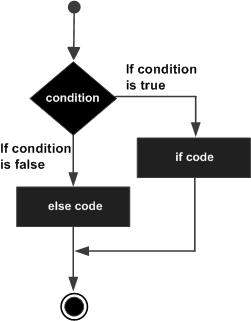

In [ ]:
x = 5

if x == 5:
    print("Yes")
else:
    print("No")

## Back to `coxiella`

### Take a look at `coxiella`'s features attribute:

In [ ]:
coxiella.features

### It's actually a container with a whole bunch of features, which each also have attributes

### We can loop through these features and parse them one at a time with a `for` loop

In [ ]:
for f in coxiella.features:
    print(f.type)
    print(f.location)
    print(f.strand)

### Knowing this, we can count a feature of interest

#### First, make a place to store the count (initialize a variable)

In [ ]:
count = 0

#### Then loop through `coxiella`'s features, adding one to the count each time

In [ ]:
for f in coxiella.features:
    count = count + 1
print(count)

##### What did we just count?

##### What would happen if we ran this code again?

### If we want to count _just_ tRNAs, we can use the `type` attribute of `coxiella`'s features

In [ ]:
tRNA_ct = 0
for f in coxiella.features:
    if f.type == 'tRNA':
        tRNA_ct += 1
print(tRNA_ct)

##### `tRNA_ct += 1` is another way to write `tRNA = tRNA + 1`

### Features also have a `strand` attribute. If a feature is on the forward strand, `strand == 1`. If a feature is on the reverse strand, `strand == -1`.

##### How can we use this information to count tRNAs on the reverse strand?

##### What is this code going to count?

In [ ]:
tRNA_ct = 0
compl_ct = 0

for f in coxiella.features:
    if f.type == 'tRNA':
        tRNA_ct += 1
    if f.strand == -1:
        compl_ct += 1

print('tRNA count: ', tRNA_ct)
print('complement count: ', compl_ct)

### Since we are interested in tRNAs that are _also_ on the complement strand, we need to nest our `if` statement about `strand` inside our `if` statement about `type`

In [ ]:
tRNA_ct = 0
compl_ct = 0

for f in coxiella.features:
    if f.type == 'tRNA':
        tRNA_ct += 1
        if f.strand == -1:
            compl_ct += 1

print('tRNA count: ', tRNA_ct)
print('complement count: ', compl_ct)

### We could expand on this to get a closer look at any feature of interest...

In [ ]:
tRNA_ct = 0
CDS_ct = 0
rRNA_ct = 0

for f in coxiella.features:
    if f.type == 'tRNA':
        tRNA_ct += 1
    if f.type == 'CDS':
        CDS_ct += 1
    if f.type == 'rRNA':
        rRNA_ct += 1

print('tRNA count: ', tRNA_ct)
print('CDS count: ', CDS_ct)
print('rRNA count: ', rRNA_ct)

### ...Or to get more information about any features of interest

In [ ]:
for f in coxiella.features:
    if f.type == 'CDS':
        name = f.qualifiers['locus_tag']
        loc = f.location
        product = f.qualifiers['product']
        
        print('locus tag: ', name)
        print('location: ', loc)
        print('product: ', product)
        print('\n')

## How do we know what kind of information (*attributes*) or things we can do to the information (*methods*) are available?

##### Method example:

In [ ]:
coxiella.seq.reverse_complement()

### 1) Read the documentation 

#### Full BioPython wiki:
##### http://biopython.org/wiki/Documentation

#### Cookbook for getting started:
##### http://biopython.org/DIST/docs/tutorial/Tutorial.html

### 2) Use an IDE (Integrated Development Environment)

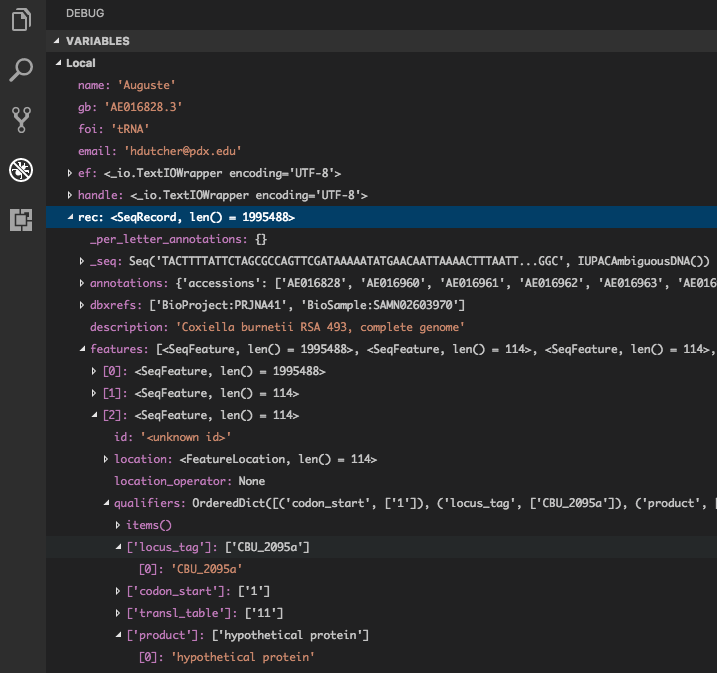

## Questions? 